<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py26_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Colab에 한글 폰트 설치하기

In [84]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# Step 2: Colab 런타임 재시작

가상머신 재부팅 과장

# Step3: matplotlib 폰트를  Nanum 폰트로 지정

In [85]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.DataFrame(data={'구':['강남구', '서초구'],'가격':[100,150]})
df

,구,가격
0,강남구,100
1,서초구,150


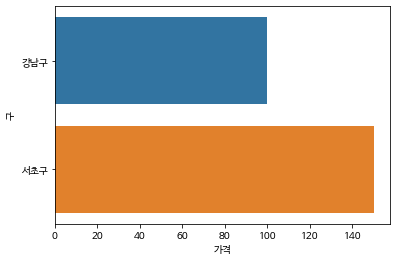

In [88]:
sns.barplot(x='가격', y='구', data=df)
plt.show()

# ■ 아파트 매매 가격 분석

*   [apt_201910.csv](https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

In [89]:
# CSV 파일이 저장된 경로
apt_file='https://raw.githubusercontent.com/JakeOh/202105_itw_bd26/main/datasets/apt_201910.csv' #국토교통부

In [90]:
# CSV 파일을 읽고 DataFrame 생성
apt = pd.read_csv(apt_file, engine='python', encoding='CP949', thousands = ',') 
# thousands = ',': 숫자의 1000자리 구분자로 ','가 사용됨.
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


파일 인코딩 타입

* utf-8: Linux, MaxOS 등 대부분의 OS에서 텍스트의 기본 인코딩
* cp949: 한글 MS-Windows에서 텍스트의 기본 인코딩
* cp1252: 영문 MS-Windows에서 텍스트의 기본 인코딩 

In [91]:
apt.dtypes

시군구      object
번지       object
본번       object
부번        int64
단지명      object
면적      float64
계약년월      int64
계약일       int64
가격        int64
층         int64
건축년도      int64
도로명      object
dtype: object

In [92]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [93]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


In [94]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


## 숫자 타입 변수들 기술 통계량

In [95]:
apt[['면적','가격','층', '건축년도']].describe()

,면적,가격,층,건축년도
count,42758.000000,42758.000000,42758.000000,42758.000000
mean,75.990614,31719.163946,9.614575,2002.652252
std,24.816118,26001.893045,6.582509,9.716009
min,10.020000,600.000000,-1.000000,1962.000000
25%,59.820000,15500.000000,4.000000,1995.000000
50%,82.536900,25400.000000,9.000000,2003.000000
75%,84.961200,40000.000000,13.000000,2011.000000
max,291.336000,485000.000000,70.000000,2019.000000


## 기술 통계량 시각화

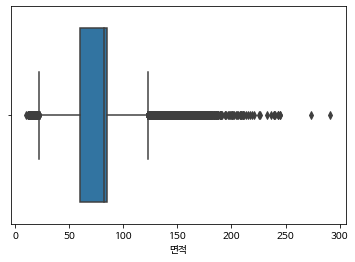

In [96]:
# 아파트 면적 시각화 - 연속형은 주로 box,histogram
sns.boxplot(x='면적', data=apt)
plt.show()

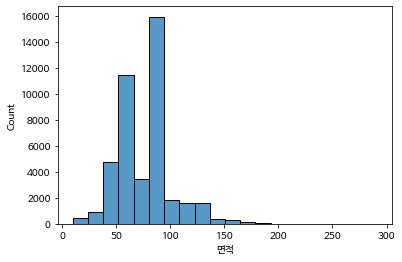

In [97]:
# 히스토그램
sns.histplot(x='면적', data=apt, bins=20)
plt.show()

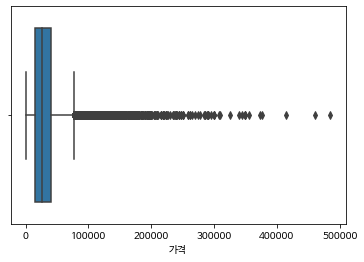

In [98]:
# 가격 시각화
sns.boxplot(x='가격', data=apt)
plt.show()

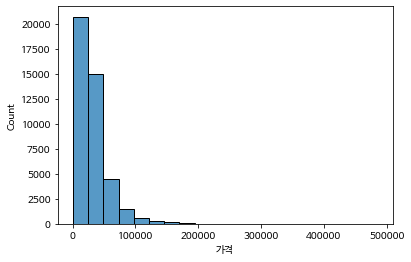

In [99]:
sns.histplot(x='가격', data=apt, bins=20)
plt.show()

## 파생 변수 추가
* province: 광역시도
* year: 매매 연도
* month: 매매 월

In [100]:
#'시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    #'강원도 강릉시 견소동' -> '강원도'

# 리뷰
apt['province'] = apt['시군구'].str.split().str[0]
# apt['province'] = apt['시군구'].str.split(' ', expand=True)[0]
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [101]:
apt['province'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [102]:
province_counts = apt['province'].value_counts()

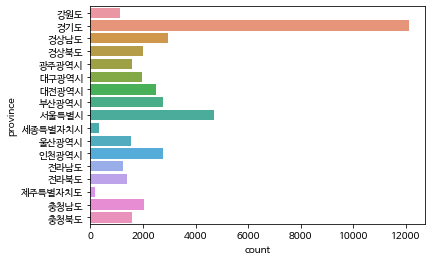

In [103]:
sns.countplot(y='province', data=apt)
plt.show()

In [104]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28,충청북도
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32,충청북도
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32,충청북도
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32,충청북도
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32,충청북도


In [105]:
# apt['계약년월'].str[:4]

In [106]:
# 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
    # 시군구 파생 변수
apt['county'] = apt['시군구'].str.split().str[1] # 시 파생병송

In [107]:
apt['dong']= apt['시군구'].str.split().str[2] # 동 파생변수 생성
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동


In [108]:
apt['dong'].unique()

array(['견소동', '교동', '남문동', ..., '지현동', '칠금동', '호암동'], dtype=object)

In [109]:
apt['year'] = apt['계약년월'] // 100  # 몫
apt['month'] = apt['계약년월'] % 100  # 나머지

In [110]:
apt['year'].unique()

array([2019])

In [111]:
apt['month'].unique()

array([10])

## 광역시도별 분석

In [112]:
# 도/광역시도별 아파트 매매가격의 개수, 평균, 최솟값, 최댓값
result = apt.groupby(by='province')['가격'].agg(['count', 'mean', 'min', 'max'])

In [113]:
# 결과를 매매가격 평균의 내림차순 정렬
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
경기도,12126,36447.593765,2700,262000
세종특별자치시,315,33577.206349,2880,82200
인천광역시,2761,30196.960884,4000,300000
부산광역시,2752,29593.587209,1500,376640
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
울산광역시,1562,26581.768246,4000,81000
제주특별자치도,165,25878.181818,6000,76500


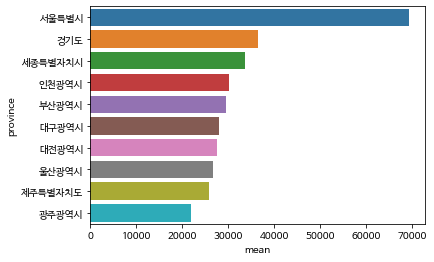

In [114]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

In [115]:
top10_max = result.sort_values(by='max', ascending=False).head(n=10)
top10_max 

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
부산광역시,2752,29593.587209,1500,376640
인천광역시,2761,30196.960884,4000,300000
경기도,12126,36447.593765,2700,262000
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
광주광역시,1588,21786.904282,4150,115000
충청북도,1576,18068.494289,1100,96000
충청남도,2045,17494.407824,1500,90000


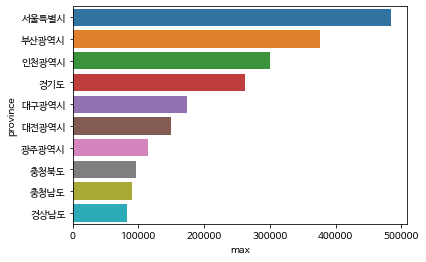

In [116]:
sns.barplot(x='max', y=top10_max.index, data=top10_max)
plt.show()

In [117]:
bottom10_min = result.sort_values(by='min').head(n=10) # 기본값 ascending=True 오름차순 정렬
bottom10_min

,count,mean,min,max
province,,,,
경상북도,1985,15304.175819,600,50000
전라북도,1394,14655.274032,900,68700
강원도,1143,14305.559930,950,45800
충청북도,1576,18068.494289,1100,96000
전라남도,1234,14523.552674,1330,61800
대구광역시,1969,28031.251397,1500,173500
부산광역시,2752,29593.587209,1500,376640
충청남도,2045,17494.407824,1500,90000
대전광역시,2487,27591.418979,2400,150000


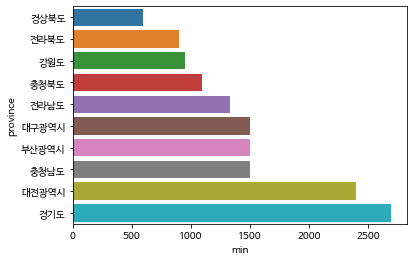

In [118]:
sns.barplot(x='min', y=bottom10_min.index, data=bottom10_min)
plt.show()

## 면적이 $84 m^2$ 이상 $100 m^2$ 미만인 아파트 거래 가격 분석

In [119]:
apt_midsize = apt[(apt['면적'] >= 84) & (apt['면적'] < 100)]
apt_midsize

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29,강원도,강릉시,교동,2019,10
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78,강원도,강릉시,교동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42752,충청북도 충주시 호암동,547-6,547,6,호반현대,84.9600,201910,26,9050,1,1994,신촌2길 29,충청북도,충주시,호암동,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,호암동,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,호암동,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.6800,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,호암동,2019,10


In [120]:
result = apt_midsize.groupby(by='province')['가격'].agg(['count', 'mean', 'min', 'max'])
result

,count,mean,min,max
province,,,,
강원도,393,19480.854962,5200,45800
경기도,4659,39507.718395,7000,165000
경상남도,1171,24684.422716,5800,69400
경상북도,731,20489.586867,4500,47250
광주광역시,612,28226.101307,11500,70500
대구광역시,758,33837.645119,11800,91000
대전광역시,1066,30905.909944,7500,89500
부산광역시,886,36020.182844,9800,85000
서울특별시,1511,79348.775645,27500,340000


In [121]:
# 중간 크기 아파트의 매매 건수 순서
top10 = result.sort_values(by='count', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
경기도,4659,39507.718395,7000,165000
서울특별시,1511,79348.775645,27500,340000
경상남도,1171,24684.422716,5800,69400
대전광역시,1066,30905.909944,7500,89500
인천광역시,922,34813.131236,10100,85500
부산광역시,886,36020.182844,9800,85000
대구광역시,758,33837.645119,11800,91000
경상북도,731,20489.586867,4500,47250
충청남도,725,23877.680000,7400,67200


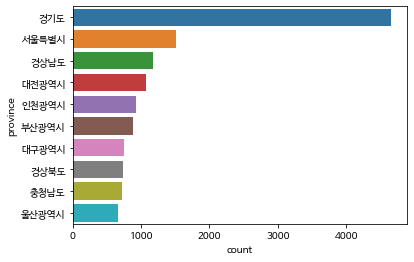

In [122]:
sns.barplot(x='count', y=top10.index, data=top10)
plt.show()

In [123]:
# 중간 크기 아파트의 매매가격 평균 순위
top10 = result.sort_values(by='mean', ascending=False)
top10

,count,mean,min,max
province,,,,
서울특별시,1511,79348.775645,27500,340000
경기도,4659,39507.718395,7000,165000
세종특별자치시,156,38979.487179,10000,74000
부산광역시,886,36020.182844,9800,85000
인천광역시,922,34813.131236,10100,85500
대구광역시,758,33837.645119,11800,91000
제주특별자치도,56,33226.785714,15800,75000
울산광역시,657,31650.003044,9000,65000
대전광역시,1066,30905.909944,7500,89500


In [124]:
# 광역시도별 매매 가격 최댓값 순서
top10 = result.sort_values(by='max', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
서울특별시,1511,79348.775645,27500,340000
경기도,4659,39507.718395,7000,165000
대구광역시,758,33837.645119,11800,91000
대전광역시,1066,30905.909944,7500,89500
인천광역시,922,34813.131236,10100,85500
부산광역시,886,36020.182844,9800,85000
제주특별자치도,56,33226.785714,15800,75000
세종특별자치시,156,38979.487179,10000,74000
광주광역시,612,28226.101307,11500,70500


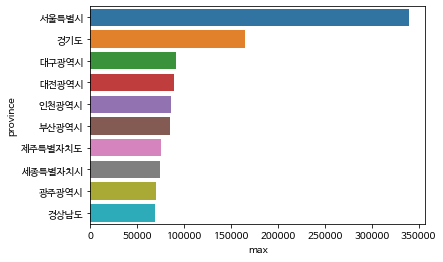

In [125]:
sns.barplot(x='max', y=top10.index, data=top10)
plt.show()

## 서울 아파트 가격 분석

In [126]:
# seoul_apt = apt[apt['province'] == '서울특별시']
seoul_apt = apt[apt['province'].str.contains('서울')]
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,개포동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,중화동,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,중화동,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,중화동,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,중화동,2019,10


In [127]:
seoul_apt['county'].unique() # 서울시의 구 이름들

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [128]:
seoul_apt['dong'].unique() # 서울시 동 이름들

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동',
       '역삼동', '일원동', '자곡동', '청담동', '강일동', '고덕동', '길동', '둔촌동', '명일동',
       '상일동', '성내동', '암사동', '천호동', '미아동', '번동', '수유동', '우이동', '가양동',
       '공항동', '내발산동', '등촌동', '마곡동', '방화동', '염창동', '화곡동', '남현동', '봉천동',
       '신림동', '광장동', '구의동', '군자동', '자양동', '중곡동', '개봉동', '고척동', '구로동',
       '궁동', '신도림동', '오류동', '온수동', '천왕동', '항동', '가산동', '독산동', '시흥동',
       '공릉동', '상계동', '월계동', '중계동', '하계동', '도봉동', '방학동', '쌍문동', '창동',
       '답십리동', '신설동', '용두동', '이문동', '장안동', '전농동', '제기동', '청량리동', '회기동',
       '휘경동', '노량진동', '대방동', '동작동', '본동', '사당동', '상도동', '신대방동', '흑석동',
       '공덕동', '노고산동', '대흥동', '도화동', '마포동', '망원동', '상수동', '상암동', '서교동',
       '성산동', '신공덕동', '신정동', '아현동', '염리동', '용강동', '중동', '창전동', '합정동',
       '현석동', '남가좌동', '대현동', '북가좌동', '북아현동', '연희동', '영천동', '창천동', '천연동',
       '충정로3가', '합동', '현저동', '홍은동', '홍제동', '반포동', '방배동', '서초동', '양재동',
       '우면동', '잠원동', '금호동1가', '금호동2가', '금호동3가', '금호동4가', '마장동', '상왕십리동',
       '성수동

In [129]:
# 서울시 구별 아파트 매매 건수, 매매 가격 평균, 최솟값, 최댓값
result = seoul_apt.groupby(by='county')['가격'].agg(['count', 'mean', 'min', 'max'])

In [130]:
result

,count,mean,min,max
county,,,,
강남구,146,156752.739726,20500,461000
강동구,254,76776.259843,9000,175000
강북구,82,50530.487805,19500,88000
강서구,276,58559.420290,10200,133000
관악구,166,53410.228916,13000,89900
광진구,132,95781.060606,25500,185000
구로구,331,52736.495468,9500,136500
금천구,149,42771.664430,9000,93000
노원구,499,42058.597194,8500,97000


In [131]:
 #서울시 구별 아파트 매매 거래 수 순위
top10 = result.sort_values(by='count', ascending=False).head(n=10)
top10

,count,mean,min,max
county,,,,
노원구,499,42058.597194,8500,97000
성북구,353,58384.390935,12900,117000
구로구,331,52736.495468,9500,136500
강서구,276,58559.420290,10200,133000
강동구,254,76776.259843,9000,175000
송파구,226,98400.663717,16000,308000
도봉구,214,37707.149533,14000,88000
양천구,209,70187.559809,17500,224000
동대문구,190,58520.526316,10000,130000


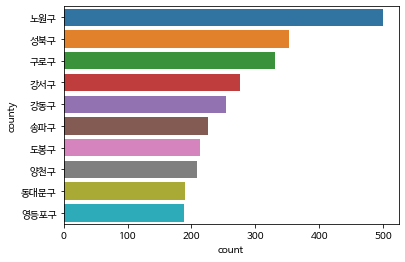

In [132]:
sns.barplot(x='count', y=top10.index, data=top10)
plt.show()

In [133]:
# 서울시 구별 아파트 매매 가격 평균 순위
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
county,,,,
강남구,146,156752.739726,20500,461000
서초구,121,150892.975207,22500,415000
용산구,75,114156.640000,17000,485000
송파구,226,98400.663717,16000,308000
광진구,132,95781.060606,25500,185000
성동구,167,93559.580838,49700,170300
마포구,145,88194.482759,16500,198000
종로구,40,86017.500000,11500,194000
동작구,176,82646.988636,15780,140000


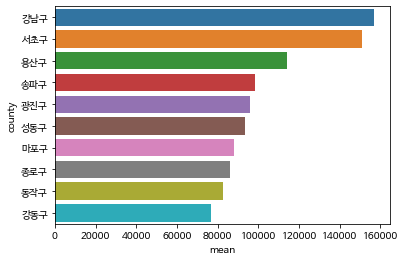

In [134]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

In [137]:
top10 = result.sort_values(by='max', ascending=False).head(n=10)
top10

,count,mean,min,max
county,,,,
용산구,75,114156.640000,17000,485000
강남구,146,156752.739726,20500,461000
서초구,121,150892.975207,22500,415000
송파구,226,98400.663717,16000,308000
영등포구,189,72392.433862,11500,259000
중구,65,74229.307692,8500,240000
양천구,209,70187.559809,17500,224000
마포구,145,88194.482759,16500,198000
종로구,40,86017.500000,11500,194000


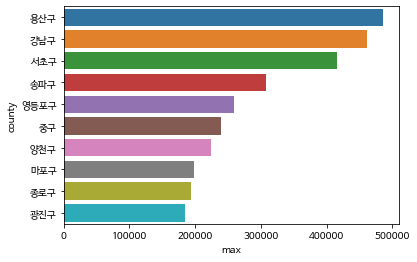

In [138]:
sns.barplot(x='max', y=top10.index, data=top10)
plt.show()

### 서울시 동별 아파트 가격 분석

In [142]:
result = seoul_apt.groupby(by='dong')['가격'].agg(['count', 'mean', 'min', 'max'])

In [143]:
result

,count,mean,min,max
dong,,,,
가락동,22,78695.454545,16000,110000
가산동,6,40550.000000,20300,53500
가양동,43,49988.372093,33500,114000
갈현동,5,38400.000000,27000,60000
강일동,19,67026.315789,58500,85000
...,...,...,...,...
회현동1가,3,125500.000000,113000,143500
효창동,6,87500.000000,59000,130000
후암동,3,78066.666667,30200,129000


In [145]:
# 매매 건수 순위
top10 = result.sort_values(by='count', ascending=False).head(n=10)
top10

,count,mean,min,max
dong,,,,
상계동,198,40474.242424,23200,78000
구로동,120,47075.250000,9800,118000
중계동,108,46145.740741,16300,97000
시흥동,101,39634.435644,9000,86000
봉천동,97,56228.340206,13000,89900
신월동,78,41164.102564,17500,79000
공릉동,78,37887.179487,8500,71500
신정동,77,74342.207792,29950,176000
창동,76,44913.815789,18700,88000


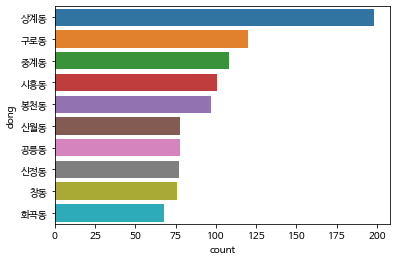

In [147]:
sns.barplot(x='count', y=top10.index, data=top10)
plt.show()

In [148]:
# 매매 가격 평균 순위
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
dong,,,,
압구정동,10,263250.000000,170000,355000
반포동,17,224200.000000,87700,415000
잠원동,15,194313.333333,109000,295000
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
홍파동,2,176500.000000,159000,194000
한강로3가,1,175000.000000,175000,175000
여의도동,8,172562.500000,105000,259000
청담동,10,170200.000000,75000,300000


In [153]:
# 매매 건수가 20건 이상인 동에서 매매 가격 평균 순위
top10 = result[result['count'] >= 20].sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
dong,,,,
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
도곡동,23,169347.826087,31800,461000
방배동,31,142812.903226,57000,250000
개포동,21,137223.809524,60700,270000
이촌동,20,136027.400000,25000,289998
서초동,45,131484.444444,22500,261000
역삼동,22,130213.636364,20500,245000
고덕동,23,106947.826087,52200,150000


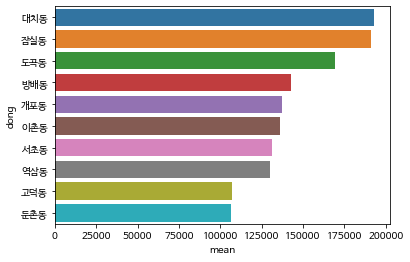

In [154]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

In [155]:
result.sort_values(by='max', ascending=False).head(n=10)

,count,mean,min,max
dong,,,,
한남동,6,159666.666667,27000,485000
도곡동,23,169347.826087,31800,461000
반포동,17,224200.000000,87700,415000
대치동,22,192795.454545,30000,373000
압구정동,10,263250.000000,170000,355000
잠실동,22,191459.090909,145000,308000
청담동,10,170200.000000,75000,300000
잠원동,15,194313.333333,109000,295000
삼성동,7,168714.285714,103000,290000


### 서울시 중형 크기의 아파트 가격 분석

$84 m^2$ 이상 $100 m^2$ 미만

In [159]:
seoul_midsize = seoul_apt[(seoul_apt['면적'] >= 84) & (seoul_apt['면적'] < 100)]

In [160]:
seoul_midsize.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.80,201910,1,93000,4,2004,도산대로30길 56,서울특별시,강남구,논현동,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.58,201910,17,190000,3,2000,도곡로78길 22,서울특별시,강남구,대치동,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.91,201910,6,159000,5,1999,삼성로64길 12,서울특별시,강남구,대치동,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.97,201910,14,277000,35,2015,삼성로51길 37,서울특별시,강남구,대치동,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.93,201910,20,275000,23,2015,삼성로51길 35,서울특별시,강남구,대치동,2019,10


In [163]:
# 서울시 중형 아파트의 구별 매매 건수, 매매 가격 평균, 최솟값, 최댓값
result = seoul_midsize.groupby(by='county')['가격'].agg(['count', 'mean', 'min', 'max'])
result

,count,mean,min,max
county,,,,
강남구,35,156277.142857,93000,277000
강동구,104,86512.692308,40000,175000
강북구,25,56340.000000,38000,87000
강서구,83,75020.481928,36900,126500
관악구,51,62277.450980,40750,80500
광진구,54,99011.111111,48000,130000
구로구,106,62302.358491,35300,124800
금천구,41,55573.170732,34300,93000
노원구,72,56870.138889,28000,90000


In [169]:
# 매매 건수 상위 10개 구
top10= result.sort_values(by='count', ascending=False).head(n=10)

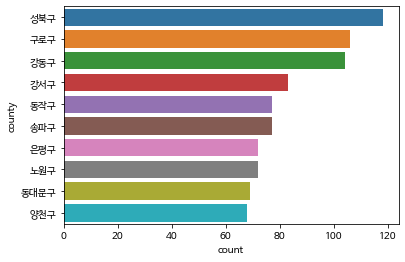

In [170]:
sns.barplot(x='count', y=top10.index, data=top10)
plt.show()

In [173]:
# 서울시 중형 아파트 동별 매매 가격 평균 순위
top10= result.sort_values(by='mean', ascedning=False)
top10

TypeError: ignored